# Mid Term Project

In [1]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
np.random.seed(0)
import random

In [3]:
#Loading dataset
train = pd.read_csv("/content/drive/MyDrive/Deep Learning/Mid term Project/digit-recognizer/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Deep Learning/Mid term Project/digit-recognizer/test.csv")

In [4]:
#Train and Test set
X_train = train.drop(labels = ["label"], axis=1)
y_train = train['label']
X_test = test

print(X_train.shape, X_test.shape, y_train.shape)

(42000, 784) (28000, 784) (42000,)


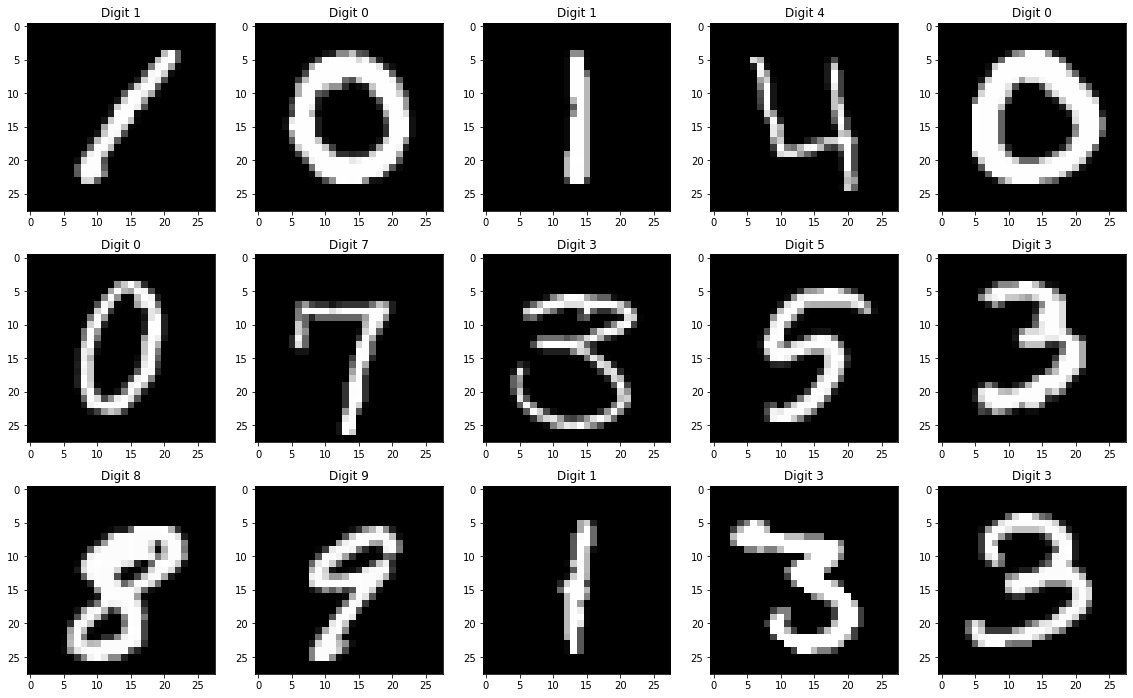

In [5]:
#Exploratory Data Analysis
X_train_plot = X_train.values.reshape(-1, 28, 28)

def Show_example_digits(mono = 'gray'):
    fig = plt.figure(figsize = (16, 16))
    for idx in range(15):
        plt.subplot(5, 5,idx+1)
        plt.imshow(X_train_plot[idx], cmap = mono)
        plt.title("Digit {}".format(y_train[idx]))
        
    plt.tight_layout()
    
Show_example_digits()

<BarContainer object of 10 artists>

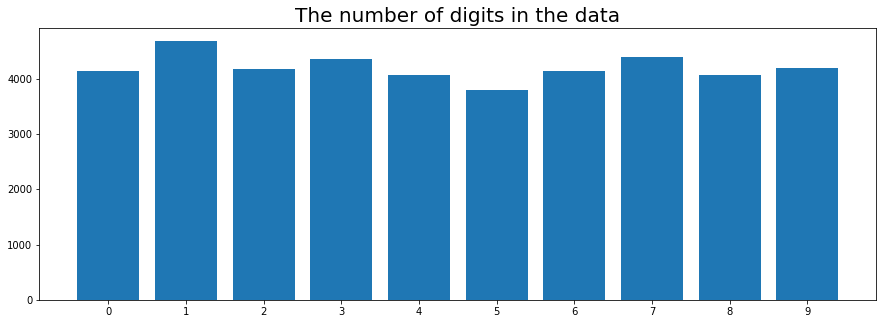

In [6]:
#Chart of the number of digits in the data
digit_range = np.arange(10)

val = y_train.value_counts().index
cnt = y_train.value_counts().values

plt.figure(figsize = (15, 5))
plt.title("The number of digits in the data", fontsize = 20)
plt.xticks(range(10))
plt.bar(val, cnt)

In [7]:
#Data Normalization
X_train = X_train/255
X_test = X_test/255

#One-hot encoding for target column 
y_train = to_categorical(y_train)

y_train.shape[1]

10

In [8]:
#Spliting the dataset
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=2, stratify=y_train)

In [11]:
#We use 3 desnse layers with 512,256, 128 neurons 
model = Sequential([
        Dense(512, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dense(y_train.shape[1], activation='softmax')
    ])

In [12]:
#Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trai

In [13]:
#Model fitting
learning_history = model.fit(X_train, y_train,
          batch_size = 1024, epochs = 40, verbose = 2, callbacks = (EarlyStopping(monitor = 'loss', patience = 6), ReduceLROnPlateau(monitor = 'loss', patience = 3)),
          validation_data=(X_valid, y_valid));

Epoch 1/40
37/37 - 6s - loss: 0.7619 - accuracy: 0.7788 - val_loss: 0.2849 - val_accuracy: 0.9160 - lr: 0.0010 - 6s/epoch - 153ms/step
Epoch 2/40
37/37 - 3s - loss: 0.2573 - accuracy: 0.9232 - val_loss: 0.1782 - val_accuracy: 0.9467 - lr: 0.0010 - 3s/epoch - 70ms/step
Epoch 3/40
37/37 - 3s - loss: 0.1814 - accuracy: 0.9455 - val_loss: 0.1393 - val_accuracy: 0.9562 - lr: 0.0010 - 3s/epoch - 71ms/step
Epoch 4/40
37/37 - 4s - loss: 0.1401 - accuracy: 0.9577 - val_loss: 0.1121 - val_accuracy: 0.9619 - lr: 0.0010 - 4s/epoch - 111ms/step
Epoch 5/40
37/37 - 5s - loss: 0.1081 - accuracy: 0.9671 - val_loss: 0.0966 - val_accuracy: 0.9679 - lr: 0.0010 - 5s/epoch - 134ms/step
Epoch 6/40
37/37 - 3s - loss: 0.0941 - accuracy: 0.9705 - val_loss: 0.0900 - val_accuracy: 0.9683 - lr: 0.0010 - 3s/epoch - 77ms/step
Epoch 7/40
37/37 - 3s - loss: 0.0762 - accuracy: 0.9766 - val_loss: 0.0781 - val_accuracy: 0.9731 - lr: 0.0010 - 3s/epoch - 69ms/step
Epoch 8/40
37/37 - 3s - loss: 0.0645 - accuracy: 0.9805 - v

In [18]:
#Accuracy
score = model.evaluate(X_valid, y_valid, verbose = 0)
print('Test loss: {}%'.format(score[0] * 100))
print('Test score: {}%'.format(score[1] * 100))

Test loss: 8.061462640762329%
Test score: 98.02380800247192%


We try to improve the test score and test loss using Convolutional Neural Networks 

**CNN**

In [19]:
#We will use 3 convolutional layers: (Conv2D, Conv2D, pool)
#We need to reshape data
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_valid = X_valid.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)
input_shape = (28, 28, 1)

In [20]:
#building a CNN model
model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape = input_shape),
        Conv2D(32, kernel_size=(3, 3), activation='relu' ),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(64, kernel_size=(3, 3), activation='relu' ),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same' ),
        Conv2D(128, kernel_size=(3, 3), activation='relu' ),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        
        Flatten(),
        
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(y_train.shape[1], activation = "softmax")
        
        ])

In [21]:
#Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                      

In [22]:
#Fitting the model
learning_history = model.fit(X_train, y_train,
          batch_size = 128,
          epochs = 50,
          verbose = 1,
          callbacks = (EarlyStopping(monitor = 'loss', patience = 6), ReduceLROnPlateau(monitor = 'loss', patience = 3)),
          validation_data = (X_valid, y_valid))

Epoch 1/50
296/296 [==============================] - 185s 620ms/step - loss: 0.4935 - accuracy: 0.8366 - val_loss: 0.0738 - val_accuracy: 0.9776 - lr: 0.0010
Epoch 2/50
296/296 [==============================] - 186s 630ms/step - loss: 0.1076 - accuracy: 0.9694 - val_loss: 0.0394 - val_accuracy: 0.9871 - lr: 0.0010
Epoch 3/50
296/296 [==============================] - 174s 589ms/step - loss: 0.0771 - accuracy: 0.9789 - val_loss: 0.0348 - val_accuracy: 0.9888 - lr: 0.0010
Epoch 4/50
296/296 [==============================] - 192s 649ms/step - loss: 0.0615 - accuracy: 0.9830 - val_loss: 0.0283 - val_accuracy: 0.9910 - lr: 0.0010
Epoch 5/50
296/296 [==============================] - 186s 629ms/step - loss: 0.0498 - accuracy: 0.9861 - val_loss: 0.0289 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 6/50
296/296 [==============================] - 195s 658ms/step - loss: 0.0443 - accuracy: 0.9869 - val_loss: 0.0329 - val_accuracy: 0.9895 - lr: 0.0010
Epoch 7/50
296/296 [==========================

In [23]:
#Accuracy
score = model.evaluate(X_valid, y_valid, verbose=0)
print('Test loss:', score[0])
print('Test score:', score[1])

Test loss: 0.03598656877875328
Test score: 0.9938095211982727


In [24]:
#Submitting the output 
output = model.predict(X_test)

output = np.argmax(output, axis = 1)

output = pd.Series(output, name="Label")

submission = pd.concat([pd.Series(range(1,28001), name = "ImageId"), output], axis = 1)

submission.to_csv("submission.csv", index=False)

875/875 [==============================] - 34s 39ms/step
